In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score

In [2]:
data=pd.read_csv("heart.csv", sep=',')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
X = data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang',
      'oldpeak','slope','ca','thal']]
Y = data.target

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
logreg= LogisticRegression()
logreg.fit(x_train, y_train)

predicted = logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
cf = confusion_matrix(y_test, predicted)
AS = accuracy_score(y_test, predicted)
F1S = f1_score(y_test, predicted)

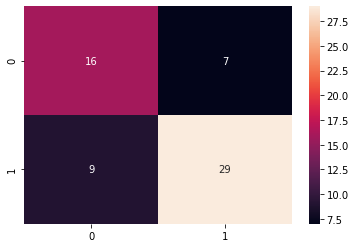

In [8]:
cf_g = sns.heatmap(cf, annot=True)
plt.show()

In [9]:
print ('accuracy = ', AS)
print ("f1 = ", F1S)

accuracy =  0.7377049180327869
f1 =  0.7837837837837838


In [10]:
cr = metrics.classification_report(y_test, predicted)

predicted2 = logreg.predict_proba(x_test)[::,1]

ax, ay, z = metrics.roc_curve(y_test, predicted2)

No handles with labels found to put in legend.


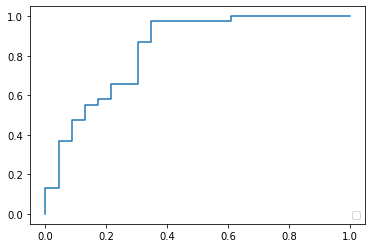

In [11]:
plt.plot(ax, ay)
plt.legend(loc=4)
plt.show()

In [12]:
print ("ROC AUC SCORE = ", metrics.roc_auc_score(y_test, predicted2))

ROC AUC SCORE =  0.8318077803203662
